In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset

df = pd.read_csv('bank-additional-full.csv')

# Selecting predictors and target variable
predictors = df[['duration', 'age']]
target = df['y']

# Encode categorical target variable 'y' to numerical values
le = LabelEncoder()
target = le.fit_transform(target)

# Splitting data into train and test sets (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.4, random_state=42)


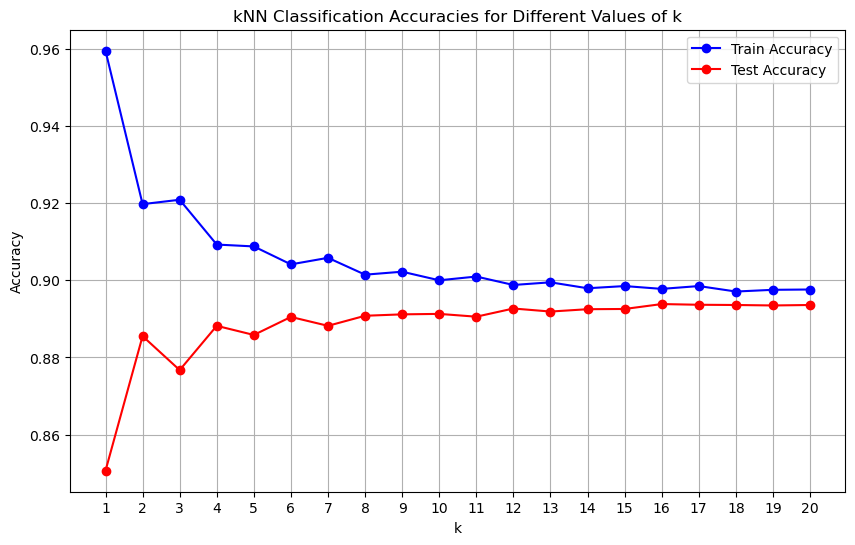

In [2]:
# Initialize lists to store accuracies
train_accuracies = []
test_accuracies = []
k_values = range(1, 21)  # Trying k values from 1 to 20

# Build kNN models for different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict on training and test data
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, marker='o', linestyle='-', color='b', label='Train Accuracy')
plt.plot(k_values, test_accuracies, marker='o', linestyle='-', color='r', label='Test Accuracy')
plt.title('kNN Classification Accuracies for Different Values of k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()
